In [13]:
#Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

#create paths
us_and_nc_df = pd.read_csv("Resources/US_NC_Combined.csv")

How do monthly average of current hospitalization in NC compare to national data?

In [14]:
# Convert the 'date' column to datetime type
us_and_nc_df['date'] = pd.to_datetime(us_and_nc_df['date'], format='%Y-%m-%d')

# Find monthly/year hospitalizations average for the USA and North Carolina
us_and_nc_df['month_year'] = us_and_nc_df['date'].dt.to_period('M')
#for USA
usa_monthly_hospitalizations = us_and_nc_df.groupby('month_year')['US HospitalizedCurrently'].mean()
#for NC
nc_monthly_hospitalizations = us_and_nc_df.groupby('month_year')['NC HospitalizedCurrently'].mean()

# Find the hospitalization rate per capita (100,000 people) per month
us_and_nc_df['hospitalization_rate_usa'] = (us_and_nc_df['US HospitalizedCurrently'] / us_and_nc_df['US Population']) * 100000
us_and_nc_df['hospitalization_rate_nc'] = (us_and_nc_df['NC HospitalizedCurrently'] / us_and_nc_df['NC Population']) * 100000

# find the average hospitalization rate per capita per month for the USA and North Carolina
average_usa_hospitalization_rate = us_and_nc_df.groupby('month_year')['hospitalization_rate_usa'].mean().values
average_nc_hospitalization_rate = us_and_nc_df.groupby('month_year')['hospitalization_rate_nc'].mean().values

# Compare the US and NC average of hospitalizations per month
print("Average Hospitalizations per Month - USA:")
print(usa_monthly_hospitalizations)
print(f"\nAverage Hospitalizations per Month - North Carolina:")
print(nc_monthly_hospitalizations)

#Compare the US and NC per capita average of hospitalizations per month
print("\nAverage Hospitalization Rate per Capita per Month - USA:")
print(average_usa_hospitalization_rate)
print(f"\nAverage Hospitalization Rate per Capita per Month - North Carolina:")
print(average_nc_hospitalization_rate)

Average Hospitalizations per Month - USA:
month_year
2020-01         0.000000
2020-02         0.000000
2020-03      3133.612903
2020-04     50347.900000
2020-05     44385.161290
2020-06     30884.100000
2020-07     52060.225806
2020-08     44909.645161
2020-09     31194.366667
2020-10     37856.838710
2020-11     72297.833333
2020-12    111852.516129
2021-01    120767.709677
2021-02     68958.928571
2021-03     43843.000000
Freq: M, Name: US HospitalizedCurrently, dtype: float64

Average Hospitalizations per Month - North Carolina:
month_year
2020-01            NaN
2020-02            NaN
2020-03      21.678571
2020-04     388.700000
2020-05     551.516129
2020-06     808.233333
2020-07    1097.483871
2020-08    1038.548387
2020-09     893.066667
2020-10    1105.096774
2020-11    1454.766667
2020-12    2696.580645
2021-01    3615.774194
2021-02    2035.285714
2021-03    1264.142857
Freq: M, Name: NC HospitalizedCurrently, dtype: float64

Average Hospitalization Rate per Capita per Month

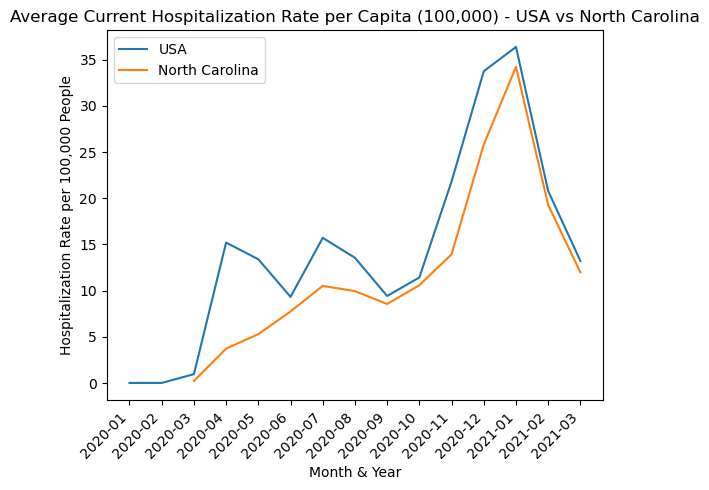

In [15]:
us_and_nc_df['month_year'] = us_and_nc_df['date'].dt.to_period('M')

# Plotting the line graph
months = sorted(us_and_nc_df['month_year'].unique().astype(str))
plt.plot(months, average_usa_hospitalization_rate, label='USA')
plt.plot(months, average_nc_hospitalization_rate, label='North Carolina')

#make it pretty
plt.title('Average Current Hospitalization Rate per Capita (100,000) - USA vs North Carolina')
plt.xlabel('Month & Year')
plt.ylabel('Hospitalization Rate per 100,000 People')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.show()

Is there a correlation between NC hospitalization rates and testing rates?

In [16]:
#find average amount of tests per month in NC
nc_monthly_testing = us_and_nc_df.groupby('month_year')['NC TotalTestResults'].mean()

#find the testing rate per capita (100,000 people) per month
us_and_nc_df['testing_rate_nc'] = (us_and_nc_df['NC TotalTestResults'] / us_and_nc_df['NC Population']) * 100000

# find the average testing rate per capita per month for North Carolina
average_nc_testing_rate = us_and_nc_df.groupby('month_year')['testing_rate_nc'].mean().values

#Compare the US and NC per capita average of hospitalizations per month
print(f"\nAverage Hospitalization Rate per Capita per Month - North Carolina:")
print(average_nc_hospitalization_rate)
print("\nAverage Testing Rate per Capita per Month - USA:")
print(average_nc_testing_rate)


Average Hospitalization Rate per Capita per Month - North Carolina:
[        nan         nan  0.20746146  3.71981478  5.27794662  7.73470106
 10.5027958   9.93878993  8.54654641 10.57565042 13.92195152 25.80597003
 34.22121473 19.26280396 11.96438213]

Average Testing Rate per Capita per Month - USA:
[           nan            nan 5.48166502e+01 7.78432092e+02
 2.45670093e+03 6.00779722e+03 1.16484121e+04 1.82513070e+04
 2.54797031e+04 3.37939970e+04 4.40026792e+04 5.70292807e+04
 7.14075500e+04 8.48165680e+04 9.09424854e+04]


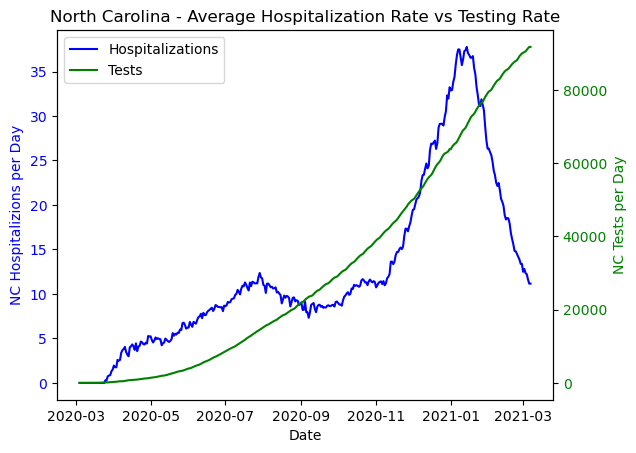

In [17]:
#plot 
# Plotting the line graph
#plt.plot(months, average_nc_testing_rate, label='Testing
#plt.plot(months, average_nc_hospitalization_rate, label='Hospitalizations')
# Convert 'month_year' to a numerical representation
#us_and_nc_df['month_numeric'] = us_and_nc_df['month_year'].dt.to_timestamp()

fig, ax1 = plt.subplots()
ax1.plot(us_and_nc_df['date'], us_and_nc_df['hospitalization_rate_nc'], color='blue', label='Hospitalizations')
ax1.set_xlabel('Date')
ax1.set_ylabel('NC Hospitalizions per Day', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(us_and_nc_df['date'], us_and_nc_df['testing_rate_nc'], color='green', label='Tests')
ax2.set_ylabel('NC Tests per Day', color='green')
ax2.tick_params(axis='y', labelcolor='green')

#make it pretty
plt.title('North Carolina - Average Hospitalization Rate vs Testing Rate')
plt.xticks(ha='right')
#plt.legend()

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the plot
plt.show()


NameError: name 'date2num' is not defined

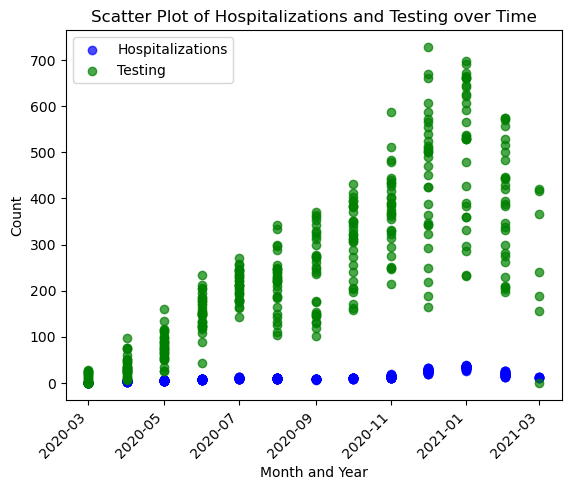

In [18]:
#fixing date issues
#us_and_nc_df['month_year'] = us_and_nc_df['month_year'].dt.to_timestamp()
#us_and_nc_df['month_year'] = pd.to_datetime(us_and_nc_df['month_year'])
#us_and_nc_df['date'] = pd.to_datetime(us_and_nc_df['date'])
#us_and_nc_df['month_year'] = us_and_nc_df['date'].dt.to_period('M').astype(str)
#us_and_nc_df = us_and_nc_df.sort_values(by='date')
us_and_nc_df['month_numeric'] = us_and_nc_df['month_year'].dt.to_timestamp()

#per capita
us_and_nc_df['testing_rate_nc'] = (us_and_nc_df['NC TotalTestResultsIncrease'] / us_and_nc_df['NC Population']) * 100000

#make a scatter plot to display data
plt.scatter(us_and_nc_df['month_numeric'], us_and_nc_df['hospitalization_rate_nc'], label='Hospitalizations', alpha=0.7, marker='o', color='blue')
plt.scatter(us_and_nc_df['month_numeric'], us_and_nc_df['testing_rate_nc'], label='Testing', alpha=0.7, marker='o', color='green')

#make pretty
plt.xlabel('Month and Year')
plt.ylabel('Count')
plt.title('Scatter Plot of Hospitalizations and Testing over Time')
plt.legend()
plt.xticks(rotation=45, ha='right')

#add linear regression lines
for column in ['NC HospitalizedCurrently', 'NC TotalTestResultsIncrease']:
    x = date2num(us_and_nc_df['month_year'])
    y = us_and_nc_df[column].values
    slope, intercept, _, _, _ = linregress(x, y)
    regression_line = slope * x + intercept
    plt.plot(us_and_nc_df['month_year'], regression_line, label=f'Regression Line ({column})', linestyle='--', linewidth=3, color='black')
    
# Display the plot
plt.show()

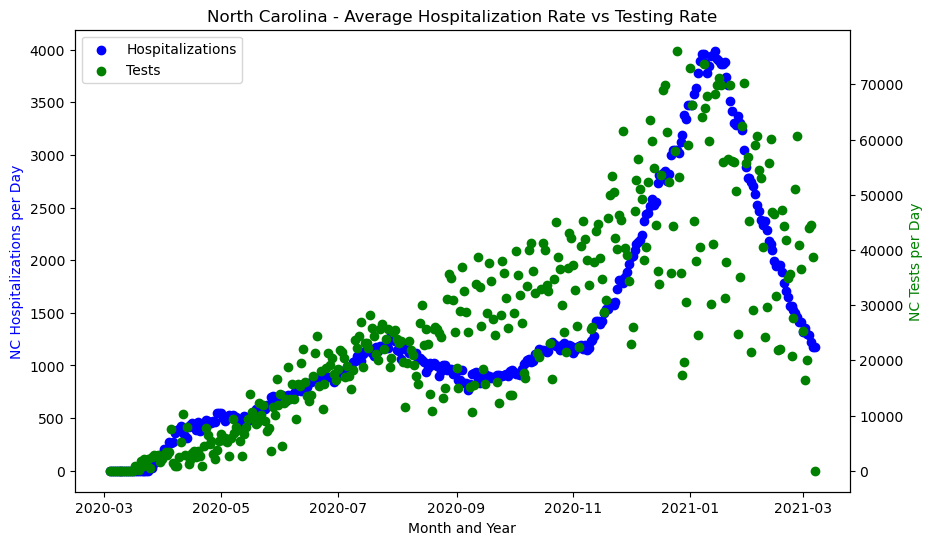

In [19]:
# Creating a scatter plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for the first dataset on the left y-axis
ax1.scatter(us_and_nc_df['date'], us_and_nc_df['NC HospitalizedCurrently'], color='blue', label='Hospitalizations')
ax1.set_xlabel('Month and Year')
ax1.set_ylabel('NC Hospitalizations per Day', color='blue')

# Creating a second y-axis for the second dataset
ax2 = ax1.twinx()
ax2.scatter(us_and_nc_df['date'], us_and_nc_df['NC TotalTestResultsIncrease'], color='green', label='Tests')
ax2.set_ylabel('NC Tests per Day', color='green')

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding title
plt.title('North Carolina - Average Hospitalization Rate vs Testing Rate')

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [20]:
correlation = us_and_nc_df['NC HospitalizedCurrently'].corr(us_and_nc_df['NC TotalTestResultsIncrease'])
print(f"Correlation Coefficient: {correlation:.2f}")

Correlation Coefficient: 0.80


Which quarter (or month) had the highest hospitalization rate in NC? Did the nation also experience the highest rate of hospitalizations during this quarter (or month)

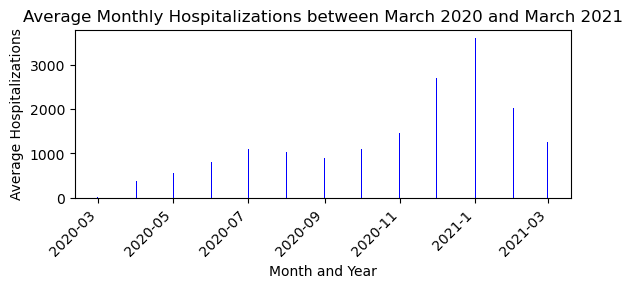

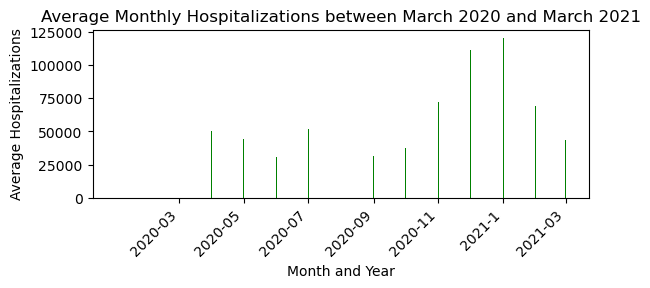

In [21]:
us_and_nc_df['date'] = pd.to_datetime(us_and_nc_df['date'])
us_and_nc_df['month_year'] = us_and_nc_df['date'].dt.to_period('M')

nc_monthly_hospitalizations = us_and_nc_df.groupby('month_year')['NC HospitalizedCurrently'].mean().reset_index()
usa_monthly_hospitalizations = us_and_nc_df.groupby('month_year')['US HospitalizedCurrently'].mean().reset_index()

plt.subplot(2, 1, 1)
plt.bar(nc_monthly_hospitalizations['month_year'].dt.to_timestamp(), nc_monthly_hospitalizations['NC HospitalizedCurrently'], color='blue')
plt.xlabel('Month and Year')
plt.ylabel('Average Hospitalizations')
plt.title('Average Monthly Hospitalizations between March 2020 and March 2021')
selected_nc_months_years = ['2020-03', '2020-05', '2020-07', '2020-09', '2020-11', '2021-1', '2021-03']
plt.xticks(pd.to_datetime(selected_nc_months_years), selected_nc_months_years, rotation=45, ha='right')
plt.show()


plt.subplot(2, 1, 2)
plt.bar(usa_monthly_hospitalizations['month_year'].dt.to_timestamp(), usa_monthly_hospitalizations['US HospitalizedCurrently'], color='green')
plt.xlabel('Month and Year')
plt.ylabel('Average Hospitalizations')
plt.title('Average Monthly Hospitalizations between March 2020 and March 2021')
selected_us_months_years = ['2020-03', '2020-05', '2020-07', '2020-09', '2020-11', '2021-1', '2021-03']
plt.xticks(pd.to_datetime(selected_us_months_years), selected_us_months_years, rotation=45, ha='right')
plt.show()


In [22]:
#Find months with highest hospitalization rates in NC and USA
nc_max_h_month = nc_monthly_hospitalizations.loc[nc_monthly_hospitalizations['NC HospitalizedCurrently'].idxmax(), 'month_year']
us_max_h_month = usa_monthly_hospitalizations.loc[usa_monthly_hospitalizations['US HospitalizedCurrently'].idxmax(), 'month_year']

print(f"The year & month with the highest hospitalization rate in NC is ({nc_max_h_month}).")
print(f"The year & month with the highest hospitalization rate in the USA is ({us_max_h_month}).")


The year & month with the highest hospitalization rate in NC is (2021-01).
The year & month with the highest hospitalization rate in the USA is (2021-01).
